In [72]:
#Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

#Read in the data 

df = pd.read_csv('/Users/max/Downloads/movies.csv')

In [73]:
#Let's look at the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [74]:
#Let's see if there is any missing data 

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f'{col} - {pct_missing}')

name - 0.0
rating - 0.010041731872717789
genre - 0.0
year - 0.0
released - 0.0002608242044861763
score - 0.0003912363067292645
votes - 0.0003912363067292645
director - 0.0
writer - 0.0003912363067292645
star - 0.00013041210224308815
country - 0.0003912363067292645
budget - 0.2831246739697444
gross - 0.02464788732394366
company - 0.002217005738132499
runtime - 0.0005216484089723526


In [75]:
# Data types for the columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [76]:
# Drop the N/A values 

df = df.dropna()

# Change data types of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')

In [77]:
# Create correct Year column

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [56]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [78]:
# Display the all rows 

pd.set_option('display.max_rows', None)

In [82]:
# Drop any duplicates

df.drop_duplicates()

df.head(25)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95.0,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133.0,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129.0,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127.0,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100.0,1980


In [ ]:
# Budget high correlation

# company high correlation

<function matplotlib.pyplot.show(close=None, block=None)>

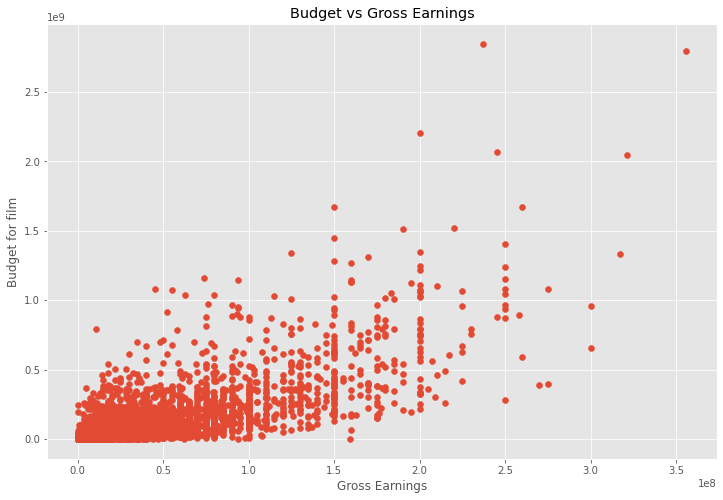

In [33]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for film')

plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

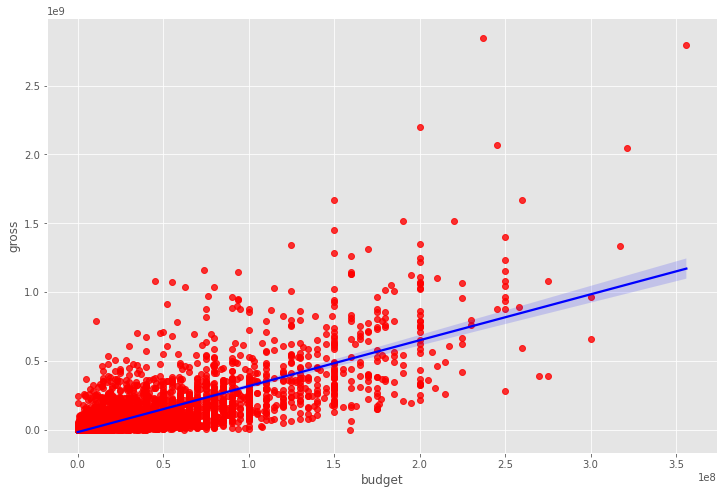

In [35]:
# Plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross',data= df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [ ]:
# Let's start looking at the correlation

In [41]:
df.corr(method='pearson') # pearson, kendall,spearman

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077,0.998726
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.998726,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


In [ ]:
# High correlation between budget and gross

<function matplotlib.pyplot.show(close=None, block=None)>

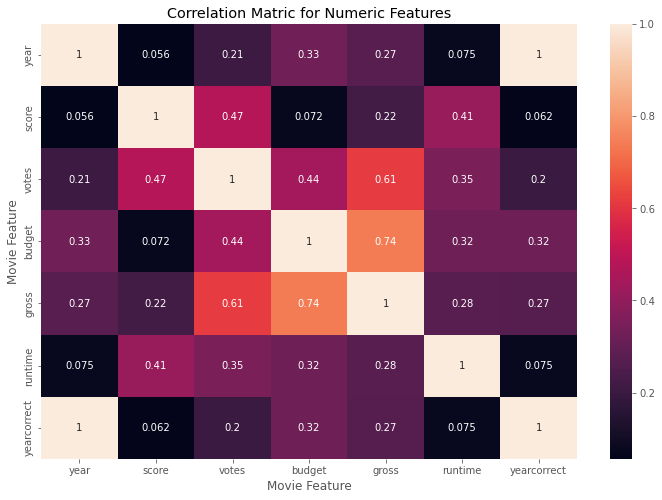

In [43]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

plt.show

In [66]:
# Looks at Company



In [67]:
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
           

<function matplotlib.pyplot.show(close=None, block=None)>

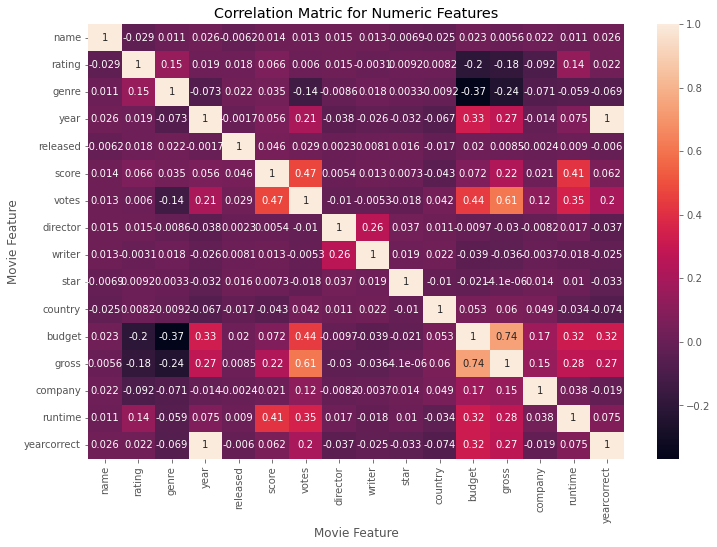

In [59]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Feature')

plt.ylabel('Movie Feature')

plt.show

In [60]:
correlation_matrix = df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,0.025542,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.019499,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,-0.073167,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
year,0.025542,0.019499,-0.073167,1.000000,-0.001740,0.056386,0.206021,-0.038354,-0.025908,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077,0.998726
released,-0.006152,0.018083,0.022142,-0.001740,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.056386,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.206021,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,-0.038354,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,-0.025908,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,-0.032157,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687


In [68]:
correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()


In [69]:
sorted_pairs = corr_pairs.sort_values()

In [70]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]


In [ ]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation